 ### 1. Problem Statement
 
* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 

### 2. Background Information
The sinking of the RMS Titanic in the early morning of __15 April 1912, four days into the ship's maiden voyage__ from __Southampton to New York City__, was one of the deadliest peacetime maritime disasters in history, __killing more 
than 1,500 people__. The largest passenger liner in service at the time, Titanic had an __estimated 2,224 people on 
board__ when she struck an __iceberg in the North Atlantic__. The ship had received __six warnings__ of sea ice but 
was travelling at near __maximum speed when the lookouts sighted the iceberg__. Unable to turn quickly enough, the 
ship suffered a glancing blow that buckled the starboard (right) side and opened __five of sixteen compartments to 
the sea__. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the __unequal treatment__ of the three passenger classes during the evacuation. Inquiries recommended sweeping changes to maritime regulations, leading to the __International Convention for the Safety of Life at Sea (1914)__, which continues to govern maritime safety.

In [2]:
#importing packages

import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as prep
from sklearn import tree
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
sns.set()

from subprocess import check_output


In [3]:
#Importing the Dataset
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv") 

### 3 Understanding the Dataset

In [4]:
titanic_data.shape    #titanic_data has 891 rows and 12 columns.

(891, 12)

In [5]:
titanic_data.columns # Columns in the dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_data.head() #top 5 values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.tail()# last 5 values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
titanic_data.info()  # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_data.isnull().sum() #From below output, we see tht Age and Cabin has maximum null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Pre-processing
- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [11]:
profile=pandas_profiling.ProfileReport(titanic_data)
profile.to_file(outputfile='titanic_before_preprocessing.html')

In [12]:
#Dropping/Replacing missing entries of Embarked.
titanic_data.Embarked=titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

#Replacing missing values of Age with median values.
age_median=titanic_data.Age.median()
titanic_data.Age.fillna(age_median, inplace=True)

#Dropping the column 'Cabin' as it has too many null values.
titanic_data.drop('Cabin',axis=1, inplace=True)

#Replacing 0 values of fare with median values.
titanic_data['Fare']=titanic_data['Fare'].replace(0,titanic_data['Fare'].median())

#Family size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

#Segmenting Child/Male/Female as per age
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'], axis=1 )


In [13]:
#check if the childs are correctly assigned
titanic_data[titanic_data.Age <15].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,3,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,1,child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,6,child


In [14]:
#check if the adults are correctly assigned
titanic_data[titanic_data['Age'] > 15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


### Post Profiling

In [15]:
profile = pandas_profiling.ProfileReport(titanic_data)
profile.to_file(outputfile='titanic_after_preprocessing.html')

The pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e titanic_after_preprocessing.html and titanic_before_preprocessing.html.
In titanic_after_preprocessing.html report, observations:

In the Dataset info, Total Missing(%) = 0.0%
Number of variables = 13

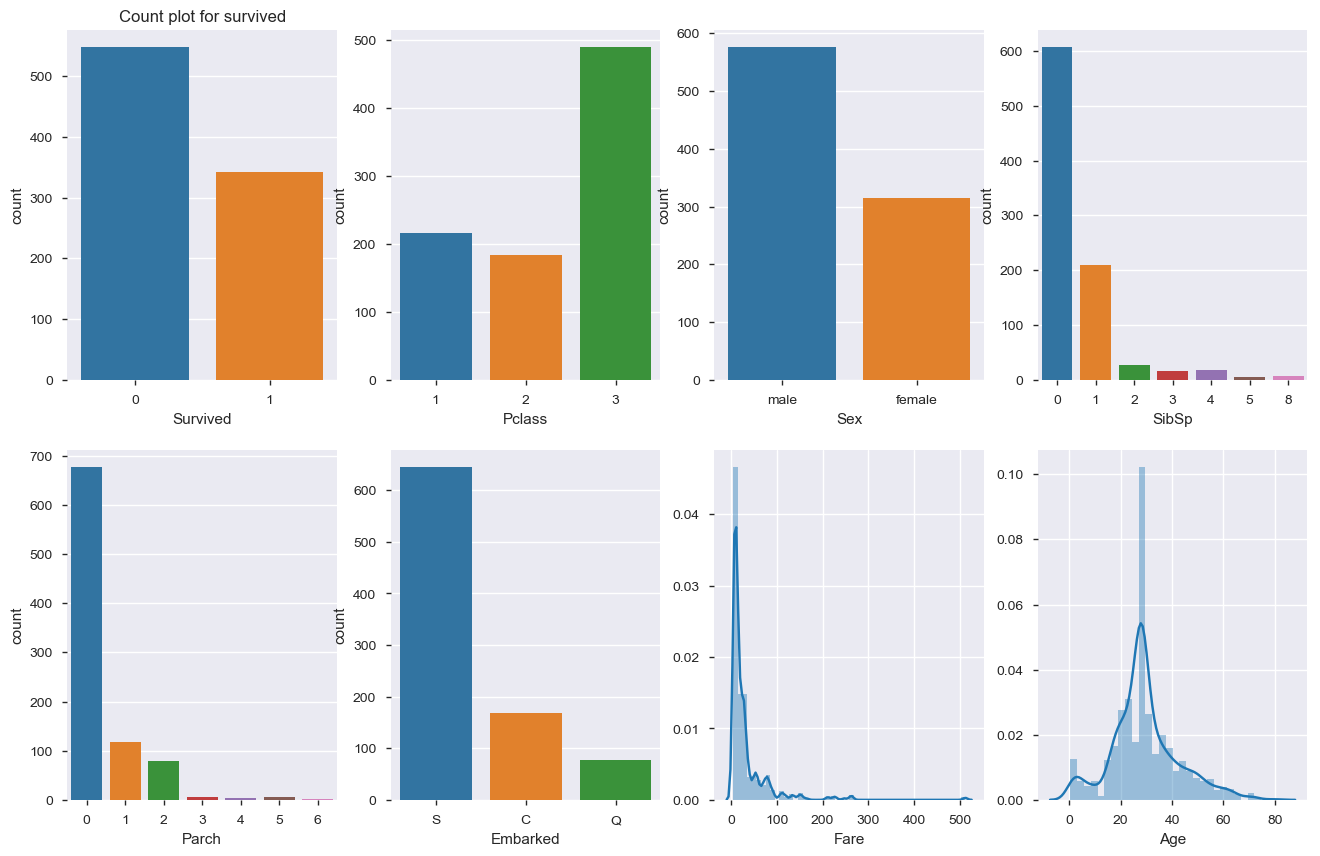

In [16]:
#UNIVARIATE DATA Plotting

fig, axes=plt.subplots(2,4, figsize=(16,10))

# how many survived and how many died
sns.countplot(x='Survived', data=titanic_data, ax=axes[0,0]).set_title('Count plot for survived')

#Pclass 
sns.countplot(x='Pclass', data=titanic_data, ax=axes[0,1])

#Sex
sns.countplot(x='Sex', data=titanic_data, ax=axes[0,2])

#Sibsp
sns.countplot(x='SibSp', data=titanic_data, ax=axes[0,3])

#Parch
sns.countplot(x='Parch', data=titanic_data, ax=axes[1,0])

#Embarked
sns.countplot(x='Embarked', data=titanic_data, ax=axes[1,1])

#Fare  (distribution plot)
sns.distplot(titanic_data.Fare, kde=True,ax=axes[1,2])

#Age (distribution plot)
sns.distplot(titanic_data.Age, kde=True, ax=axes[1,3])



In [17]:
titanic_data.groupby(['Survived'])['Survived'].count()
#549 people died and only 340 survive

Survived
0    549
1    342
Name: Survived, dtype: int64

Survived  GenderClass
0         child           33
          female          66
          male           450
1         child           45
          female         209
          male            88
Name: Survived, dtype: int64

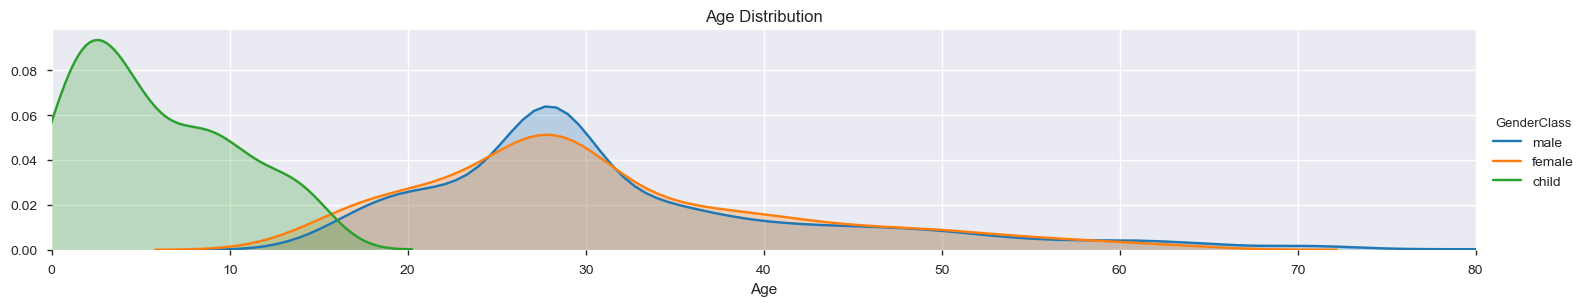

In [18]:
#Who is more likely to survive, Male or Female?

as_fig = sns.FacetGrid(titanic_data, hue='GenderClass', aspect=5)
as_fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_data.Age.max()

as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('Age Distribution')


titanic_data.groupby(['Survived','GenderClass'])['Survived'].count()

Text(0.5,1,'Survival plot for Male/Female/Child')

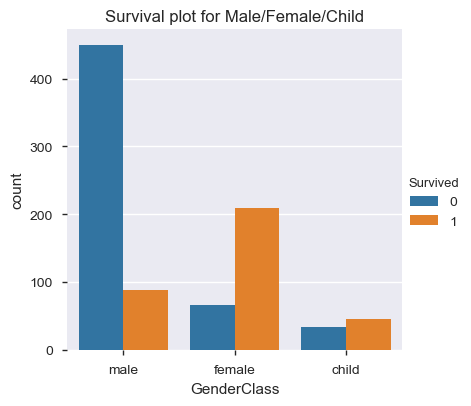

In [19]:
#Using factorplot, lets have clear vision of the survivors

sns.factorplot('GenderClass', hue='Survived', data=titanic_data, kind='count')
plt.title('Survival plot for Male/Female/Child')



Majority of males died. Females have high probability to survive.

Male
0    450
1     88
Name: Survived, dtype: int64
Female
1    209
0     66
Name: Survived, dtype: int64
Child
1    45
0    33
Name: Survived, dtype: int64
Died
549
Survived count
342


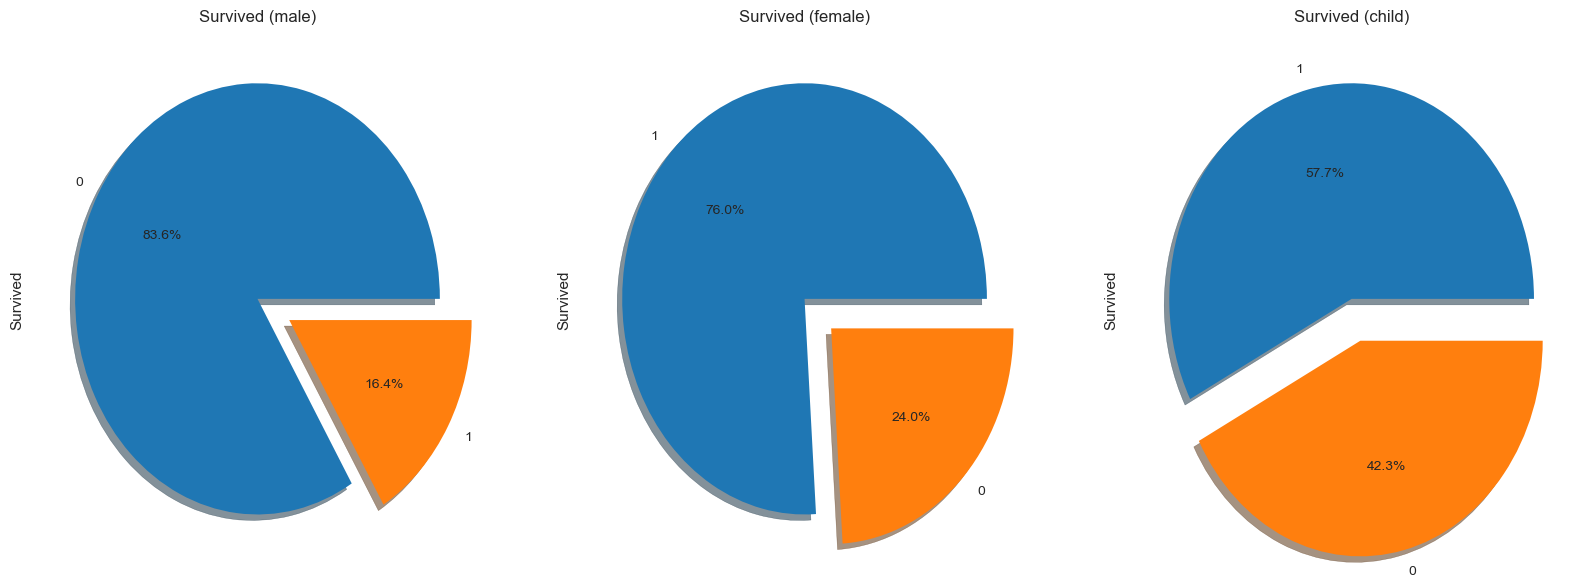

In [20]:
#Using pie plot, to know the exact %
f,ax=plt.subplots(1,3,figsize=(20,7))

titanic_data['Survived'][titanic_data['GenderClass'] =='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%', ax=ax[0], shadow=True)
titanic_data['Survived'][titanic_data['GenderClass'] =='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%', ax=ax[1], shadow=True)
titanic_data['Survived'][titanic_data['GenderClass'] =='child'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%', ax=ax[2], shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
ax[2].set_title('Survived (child)')


print("Male")
print(titanic_data['Survived'][titanic_data['GenderClass'] == 'male'].value_counts())
print("Female")
print(titanic_data['Survived'][titanic_data['GenderClass'] == 'female'].value_counts())
print("Child")
print(titanic_data['Survived'][titanic_data['GenderClass'] == 'child'].value_counts())

print("Died")
print((titanic_data.Survived==0).sum())

print("Survived count")
print((titanic_data.Survived==1).sum())

76% of females survived.
57% of children also survived.
Only 16% of males survived.

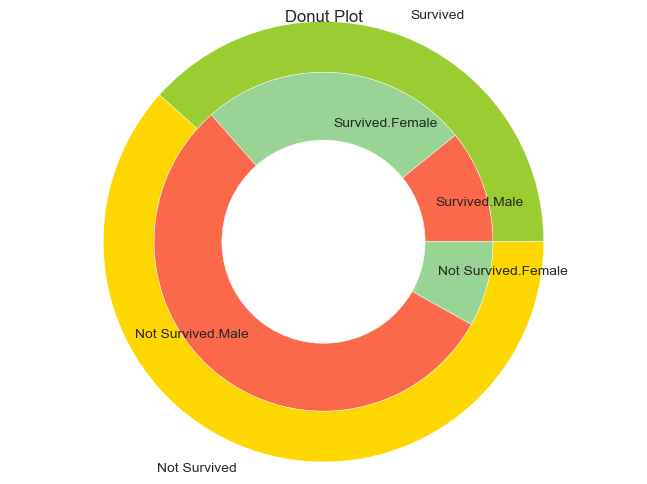

In [21]:
import matplotlib.pyplot as plt

#make data
group_names=['Survived', 'Not Survived']
group_size=[342,549]
subgroup_names=['Survived.Male', 'Survived.Female', 'Not Survived.Male', 'Not Survived.Female']
subgroup_size=[88,209,450,66]

#Creating Colors
a,b,c=[plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]

#First Ring(outside)
fig,ax=plt.subplots()
ax.axis('equal')
mypie,_ = ax.pie(group_size, radius=1.3, labels=group_names, colors=['yellowgreen', 'gold'])
plt.setp(mypie, width=0.3, edgecolor='white');

#second ring
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Donut Plot')

plt.show()

In [22]:
#Rate of survival of males/females/childs on basis of passenger class
print('% survival')
print("Pclass=1 : ", titanic_data.Survived[titanic_data.Pclass == 1].sum()/titanic_data[titanic_data.Pclass == 1].Survived.count())
print("Pclass=2 : ", titanic_data.Survived[titanic_data.Pclass == 2].sum()/titanic_data[titanic_data.Pclass == 2].Survived.count())
print("Pclass=3 : ", titanic_data.Survived[titanic_data.Pclass == 3].sum()/titanic_data[titanic_data.Pclass == 3].Survived.count())

% survival
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


In [23]:
pd.crosstab([titanic_data.GenderClass, titanic_data.Survived], titanic_data.Pclass, margins=True).apply(lambda x : 100* x/len(titanic_data), axis=1).style.background_gradient(cmap='rainbow')

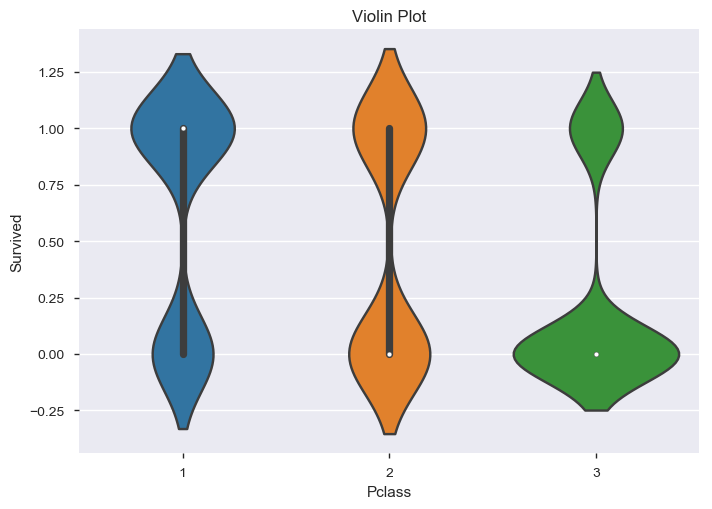

In [24]:
#Using violin plot to see the relationship between Pclass and Survived
sns.violinplot('Pclass', 'Survived', kind="point", data=titanic_data)
plt.title('Violin Plot')
plt.show()


#Pclass 3 have more people who died, and for Pclass 1 survival rate is more.

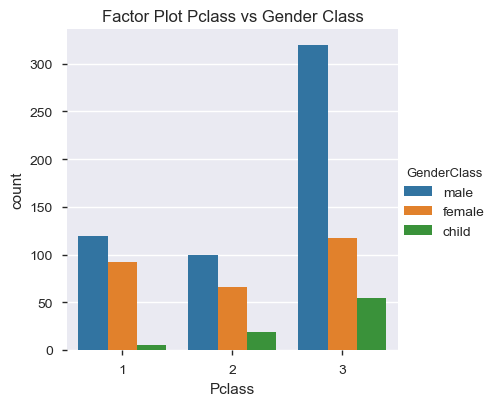

In [25]:
#factorplot to look at the distribution of popluation with Pclass and GenderClass.
sns.factorplot('Pclass', data=titanic_data, hue='GenderClass', kind='count')
plt.title('Factor Plot Pclass vs Gender Class')
plt.show()

#Pclass 3 have maximum number of males
#Pclass 1 have minimum number of children

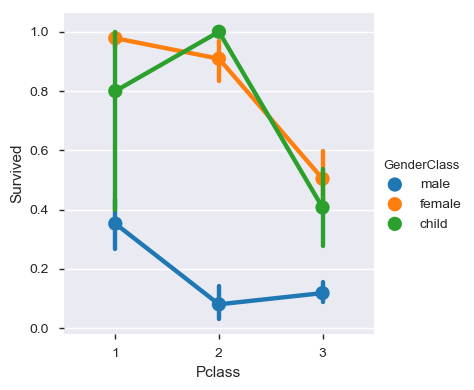

In [26]:
#factorplot to see the variation of surviavl rate with Pclass and GenderClass
sns.factorplot('Pclass','Survived', data=titanic_data, hue='GenderClass')


#the survival rate for male is very low irrespective of the class he belongs to.
#And, the survival rate is less for all the 3rd class passengers.
#Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died.

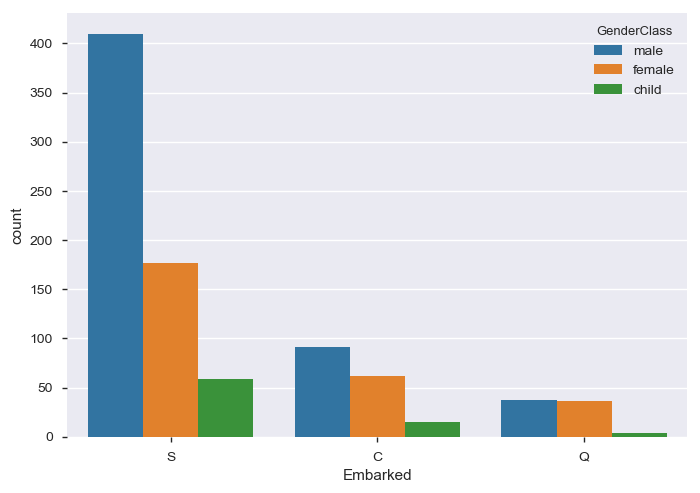

In [27]:
#Distribution of GenderClass with respect to Port of Embarkment 
sns.countplot('Embarked', data=titanic_data, hue='GenderClass')

#Most of the people boarded from S, Also among all who boarded, males constitutes the majority of percentage.

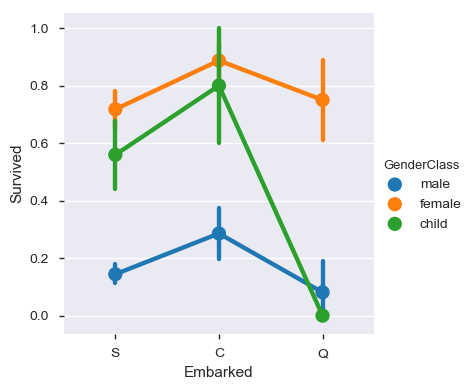

In [28]:
#Factorplot to see variation of survival rate with port of embarkment and GenderClass
sns.factorplot('Embarked', 'Survived', data=titanic_data, hue='GenderClass', kind='point')


#Chances of survival of females who boarded from C is highest.
#Chances of survival of males boarding from Q is lowest

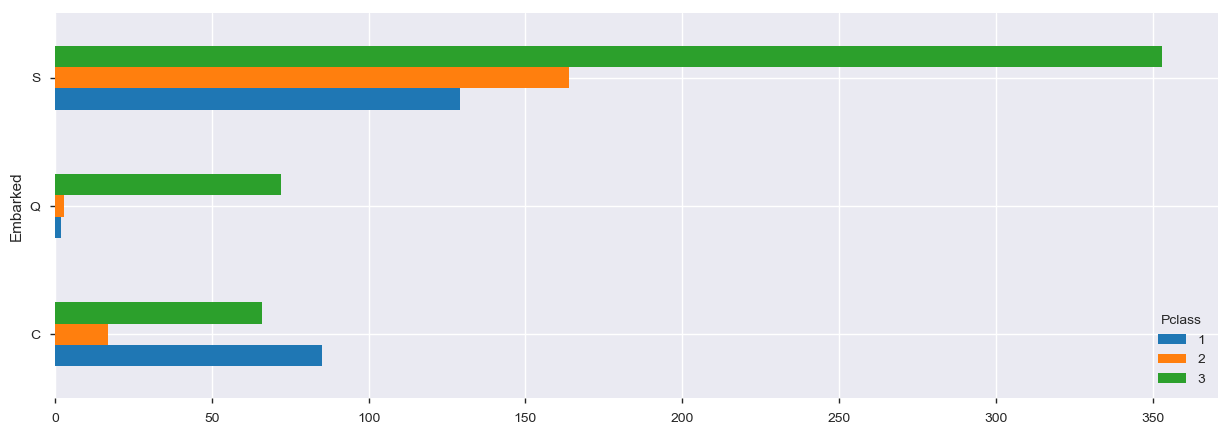

In [29]:
#Seeing relation between Pclass and Embarked.
relation = pd.crosstab(titanic_data.Embarked, titanic_data.Pclass)
relation.plot.barh(figsize=(15,5))
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


#Maximum people who boarded from S belongs to Pclass 3.
#Most of the passengers belonging to Pclass 1 boarded from C and S

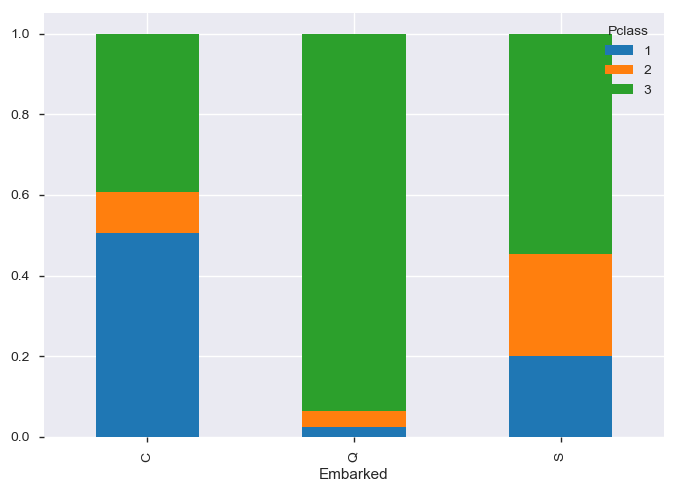

In [30]:
relation.div(relation.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

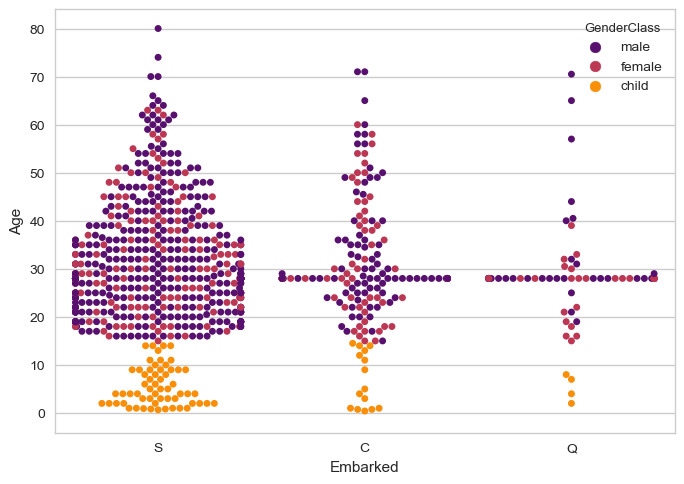

In [31]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x='Embarked', y='Age', hue='GenderClass', palette="inferno", data=titanic_data )

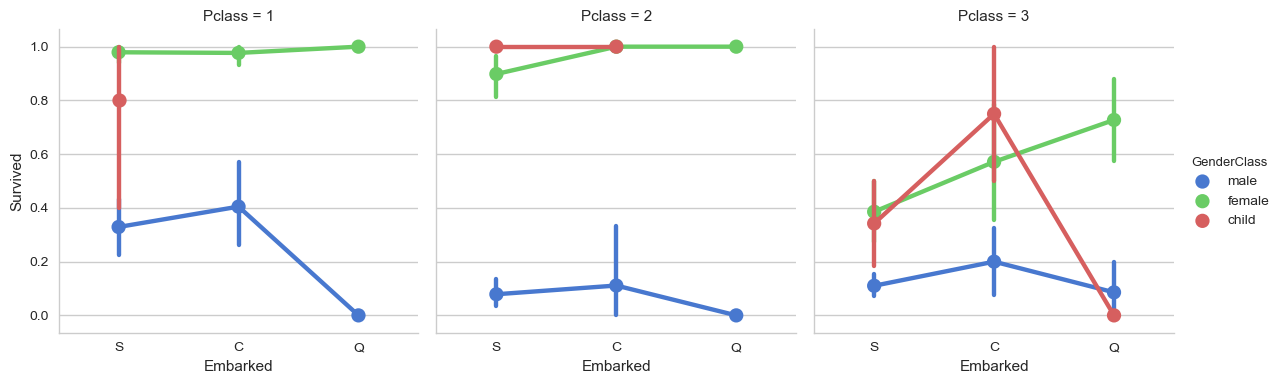

In [32]:
sns.factorplot('Embarked','Survived', col='Pclass', hue='GenderClass', kind='point', data=titanic_data)
plt.show()


#All women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived_.
#All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2.
#For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4

In [34]:
for i in range(8,0,-1):
    titanic_data.loc[titanic_data['Age'] <= i*10, 'Age_bin'] =i
    
print(titanic_data[['Age', 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5  28.0      3.0
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


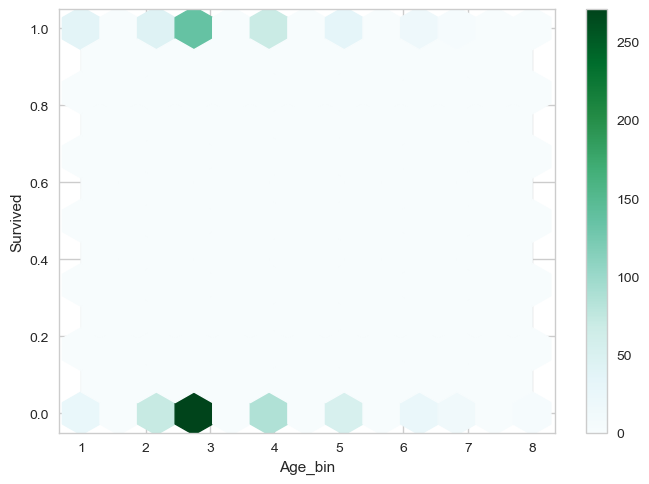

In [36]:
titanic_data.plot.hexbin(x='Age_bin', y='Survived', gridsize=12);

#Age_bin 1: As you can see hexagon for Survived( 1.0 ) is darker than Died(0.0), means more children survived than died.
#Age_bin 3: More died than survived, Also count of survived is highest among all age bins ( see horizontaly along Survived = 1.0 ) , means maximum people who boarded Titanic were from this age group.
#Age_bin >4: More people died than survived.

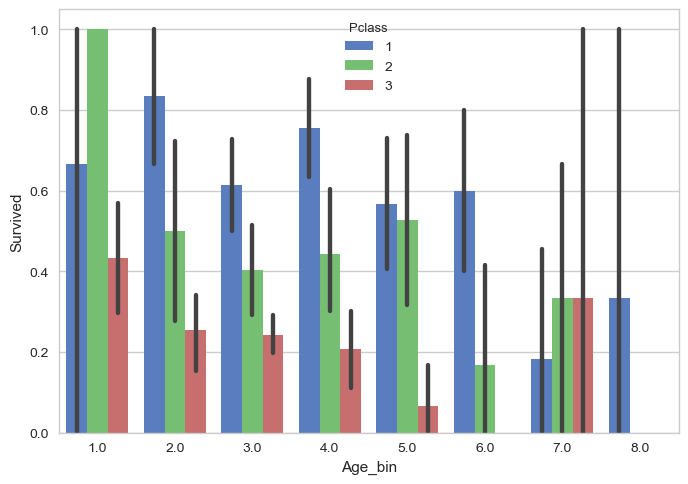

In [37]:
sns.barplot(x='Age_bin', y='Survived', hue='Pclass', data=titanic_data)
plt.show()

In [41]:
print(titanic_data[(titanic_data.Age_bin == 1)]['Pclass'].value_counts())

print(titanic_data[(titanic_data.Age_bin == 1)&(titanic_data.Pclass == 1)]['Survived'])

titanic_data[(titanic_data.Age_bin == 8)]['Pclass'].value_counts()


#Among children of age 0-10 yrs we dont have enough data points(3) in Pclass 1, therefore discarding it (blue line of Age_bin 1)
#Also number of passengers belonging to age group 70-80 yrs, is very less, therefore ignoring them.
#In each Pclass, we can see that the probability of survivying of small children(Age = 0-10 yrs) is higher than rest age group.
#In every Age_bin(ignoring Pclass 1 of first, and last Age_bin), survival probability is highest for Pclass 1 and lowest for Pclass 3.

3    44
2    17
1     3
Name: Pclass, dtype: int64
297    0
305    1
445    1
Name: Survived, dtype: int64


1    3
3    2
Name: Pclass, dtype: int64

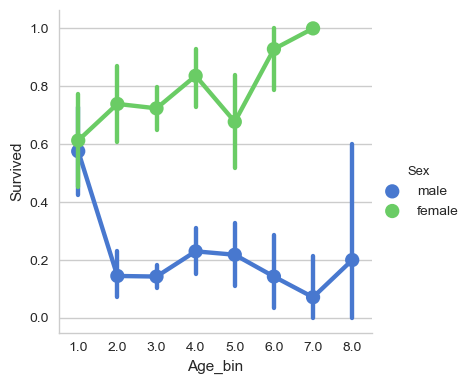

In [42]:
sns.factorplot('Age_bin', 'Survived', hue='Sex', kind='point', data=titanic_data)

#females in general have higher probability of survival than males.

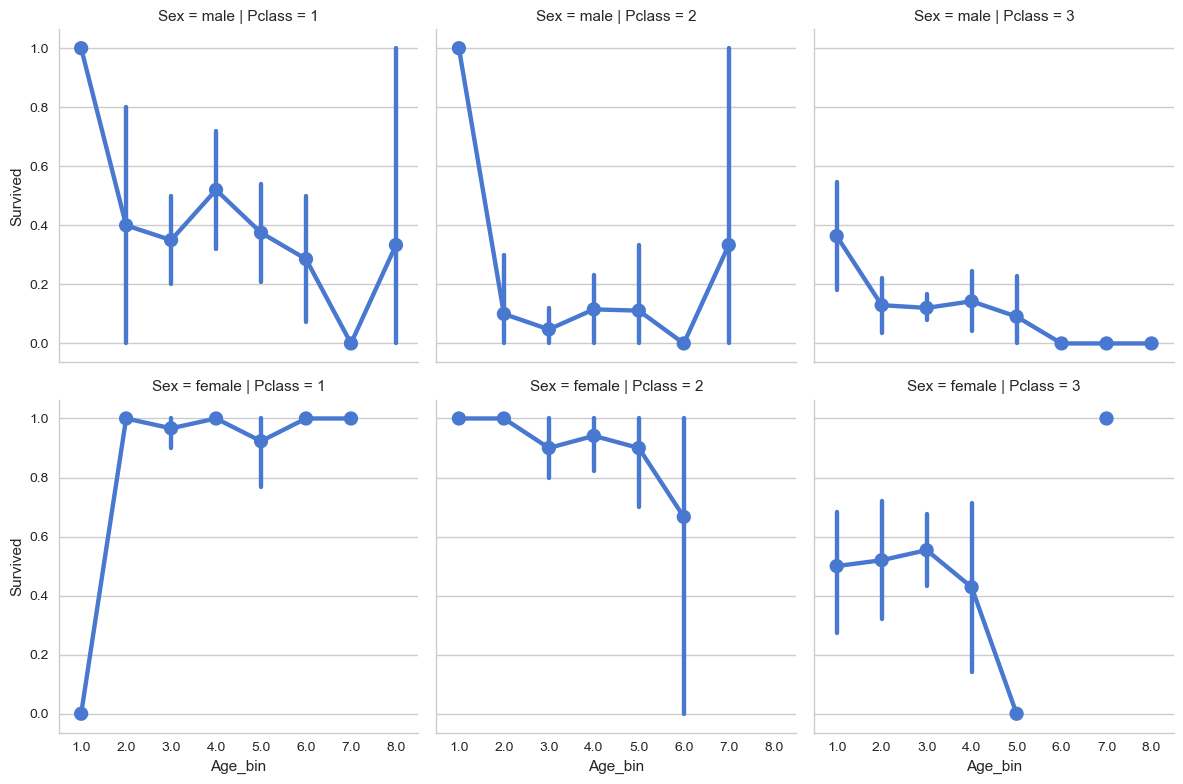

In [43]:
sns.factorplot('Age_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=titanic_data)
plt.show()


#Among males, probability of survival of children is higher than rest age groups.
#In general for males, as Pclass increases, survival probability decreases.
#Among female children (Age_bin == 1), there is only 1 girl, therfore discarding this.
#For the rest of the females, as Pclass increases, survival probability decreases.
#You can also see survival rate within each Pclass for males and females.

Text(0.5,1,'Survival by Total Family Size')

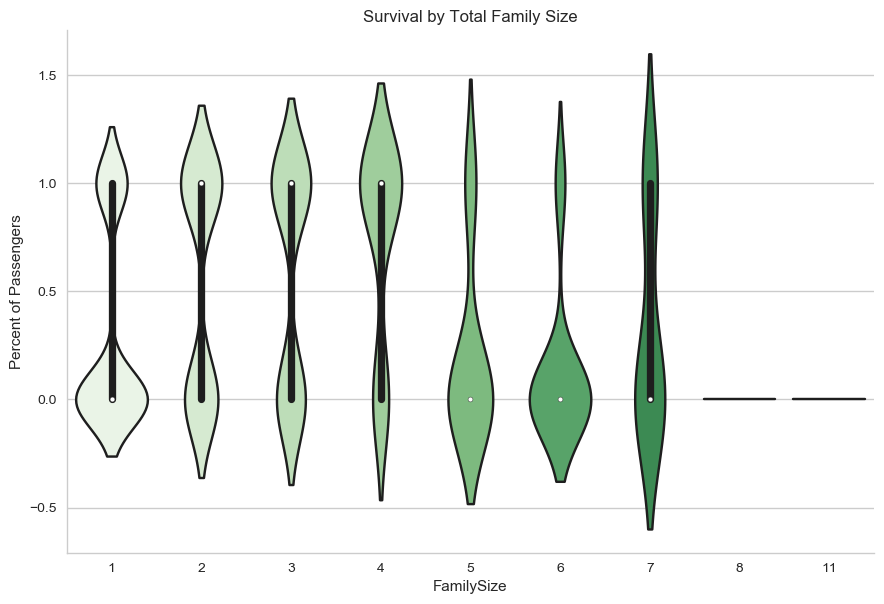

In [44]:
ax = sns.factorplot(x='FamilySize', y='Survived', data=titanic_data, kind='violin', aspect=1.5, size=6, palette="Greens")
ax.set(ylabel='Percent of Passengers')
plt.title('Survival by Total Family Size')


#As size of family increases its chances of survival also increases.

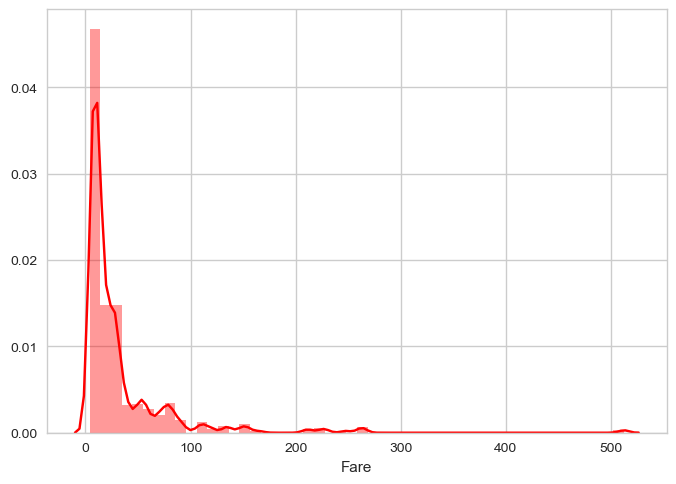

In [46]:
sns.distplot(titanic_data['Fare'],color='r')

#Fare' mostly varies between 10 and 90. We will use this information to create bins.

In [52]:
for i in range(12,0,-1):
    titanic_data.loc[titanic_data['Fare'] <= i*10, 'Fare_bin'] = i

titanic_data.loc[titanic_data['Fare'] > 110, 'Fare_bin'] = 12

In [53]:
print(titanic_data[['Fare' , 'Fare_bin']].groupby('Fare_bin')['Fare'].count())

Fare_bin
1.0     321
2.0     194
3.0     142
4.0      58
5.0      16
6.0      38
7.0      17
8.0      31
9.0      17
10.0      4
11.0      4
12.0     49
Name: Fare, dtype: int64


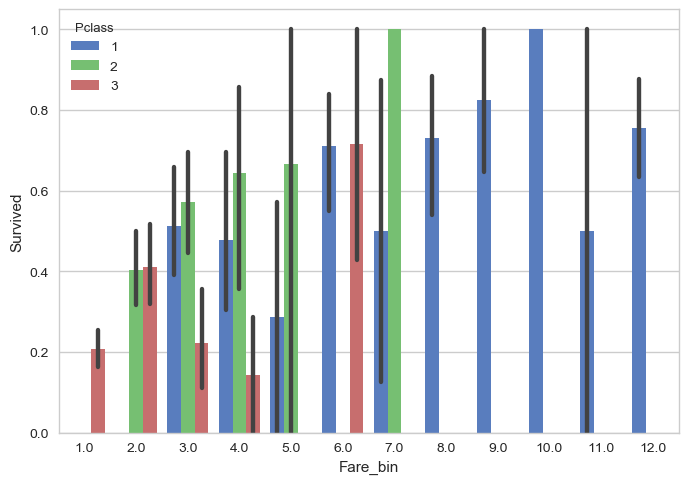

In [54]:
# barrplot to plot the relationship between survival rate and Fare_bin and Pclass.
sns.barplot(x='Fare_bin', y='Survived', hue='Pclass', data=titanic_data)
plt.show()


#As fare increases, survival chances also increases.
#Also Pclass 1 (blue color) have more chances to survive compared to other Pclass.

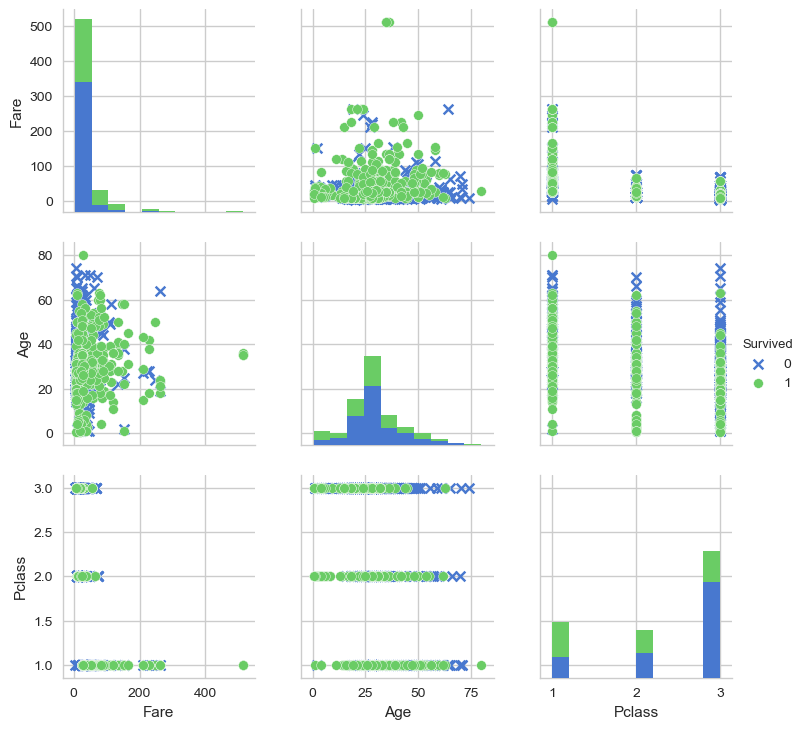

In [57]:
#pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]], vars= ["Fare","Age","Pclass"], hue='Survived', dropna=False, markers=["x", "o"])
plt.show()

Observing the diagonal elements,
- More people of Pclass 1 survived than died (First peak of red is higher than blue)
- More people of Pclass 3 died than survived (Third peak of blue is higher than red)
- More people of age group 20-40 died than survived.
- Most of the people paying less fare died.

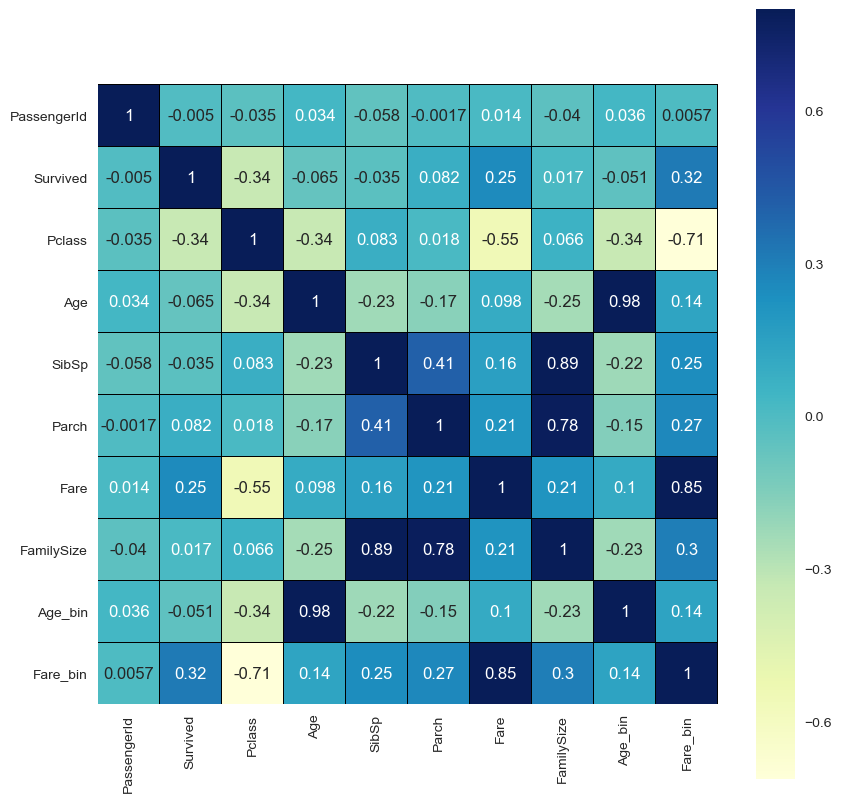

In [59]:
 #coorelation between all the features 
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=0.8,linewidth=0.01, square=True,annot=True,cmap='YlGnBu',linecolor ='black')


Age and Pclass are negatively corelated with Survived.
FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
Fare and FamilySize are positively coorelated with Survived.



- __76%__ of __females__ survived.
- __57%__ of __children__ also survived.
- Only __16%__ of __males__ survived.<br/>
Also the survival rate for male is very low irrespective of the _class_ he belongs to and the _survival rate is less_ for all the _3rd class passengers._ Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died.

### Conclusion

- __76%__ of __females__ survived.
- __57%__ of __children__ also survived.
- Only __16%__ of __males__ survived.<br/>
Also the survival rate for male is very low irrespective of the _class_ he belongs to and the _survival rate is less_ for all the _3rd class passengers._ Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died.